In [1]:
import Lib.Load as ld
import Lib.Transformations as tr
import Lib.Metrics as mt
import Lib.Modularity as mod
import Lib.SDP as sdp
import Lib.MinCut as mc
import Lib.NCG as ncg
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [19]:
def test_methods(test):
    
    sc_name = ['NMI', 'Recall', 'Precision', 'Modularity', 'Average F1', 'Normalized Cut']
    if (test == 'football' or test == 'polbooks'):
        methods = ['Spectral', 'Spectral_RW', 'Spectral_Sym', 'Greedy Mod.', 'NCG']#, 'SDP1', 'SDP2']
    else:
        methods = ['Spectral', 'Spectral_RW', 'Spectral_Sym', 'Greedy Mod.', 'NCG', 'SDP1', 'SDP2']
    
    scores = np.empty((0, len(sc_name)))
    
    n_nodes, edge_list = ld.download_graph(test)
    A = tr.compute_adj_mat(n_nodes, edge_list)
    labels_true = ld.download_labels(test)
    k = np.max(np.array(labels_true)) + 1
    
    # MinCut test
    labels_pred = mc.unnorm_predict(A, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    labels_pred = mc.lrw_predict(A, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    labels_pred = mc.lsym_predict(A, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    # Modularity test
    labels_pred = mod.Newman(n_nodes, A)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    # NCG test
    labels_pred = ncg.NCG(n_nodes, edge_list, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    # SDP test
    if (test != 'football' and test != 'polbooks'):
        labels_pred = sdp.SDP1(n_nodes, A, k)
        result = compute_scores(labels_true, labels_pred, edge_list)
        scores = np.concatenate([scores, result], axis=0)

        labels_pred = sdp.SDP2(n_nodes, A, k)
        result = compute_scores(labels_true, labels_pred, edge_list)
        scores = np.concatenate([scores, result], axis=0)

    
    scores = pd.DataFrame(scores, index=methods, columns=sc_name)
    
    for i in range(len(sc_name)):
        fig = plt.figure()
        sns_plot = sns.barplot(x=methods, y=sc_name[i],data=scores)
        sns_plot.set_title('Graph: ' + test + ';  metric: ' + sc_name[i])
        for item in sns_plot.get_xticklabels():
            item.set_rotation(20)
        fig = sns_plot.get_figure()
        #fig.savefig(test + '_' + sc_name[i])
        
    return scores

In [20]:
def compute_scores(labels_true, labels_pred, edge_list):
    
    clusters_true = tr.compute_clusters_from_labels(labels_true)
    clusters_pred = tr.compute_clusters_from_labels(labels_pred)
    
    nmi = mt.compute_nmi(labels_true, labels_pred)
    recall = mt.compute_recall(clusters_true, clusters_pred)
    precision = mt.compute_precision(clusters_true, clusters_pred)
    modularity = mt.compute_modularity(labels_pred, edge_list)
    avg_f1 = mt.compute_avg_f1(clusters_true, clusters_pred)
    norm_cut = mt.compute_normalized_cut(labels_pred, clusters_pred, edge_list)
    
    return np.array([[nmi, recall, precision, modularity, avg_f1, norm_cut]])

Here we launch described algorithms on our four graphs. Each barplot corresponds to some graph and some metric. Each column on such graph presents the score of one algorithm.

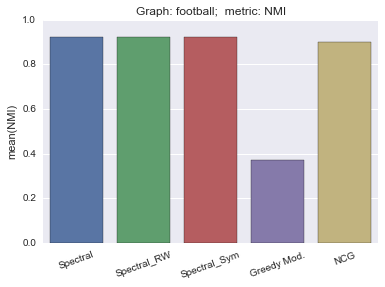

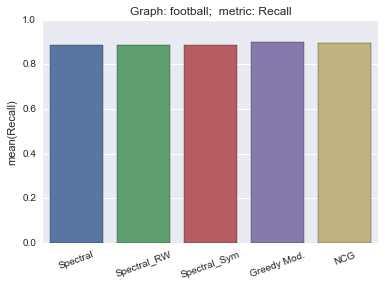

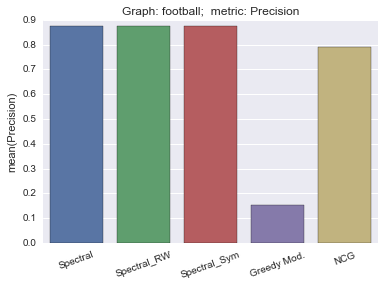

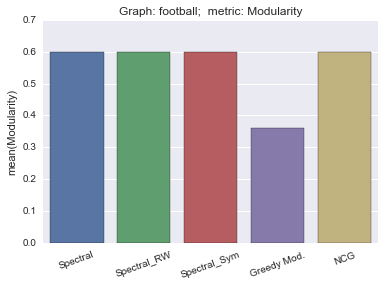

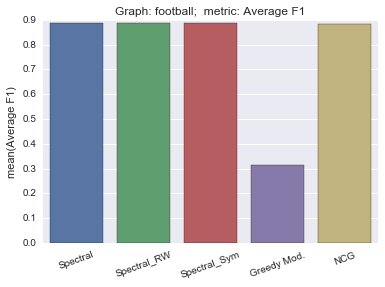

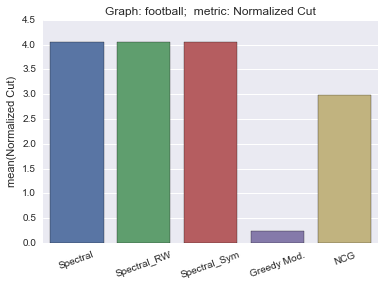

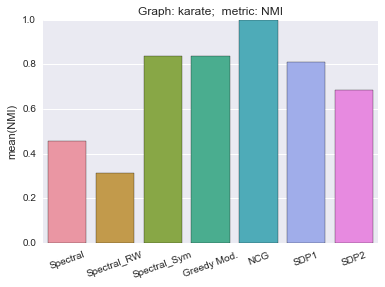

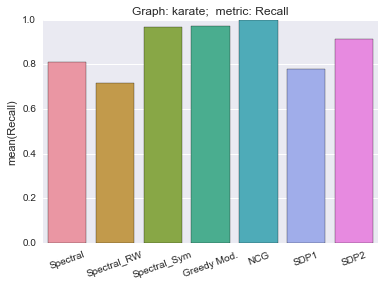

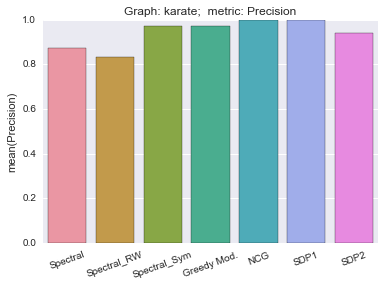

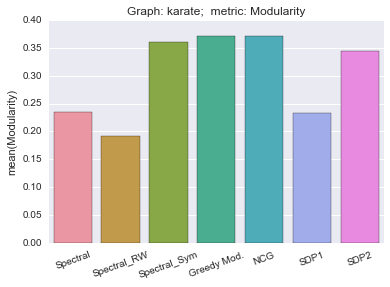

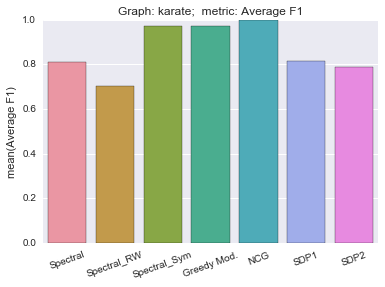

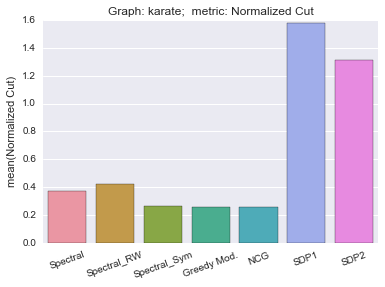

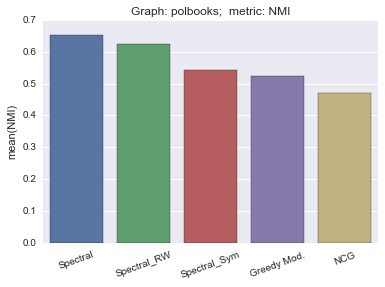

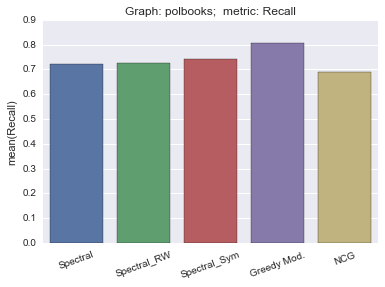

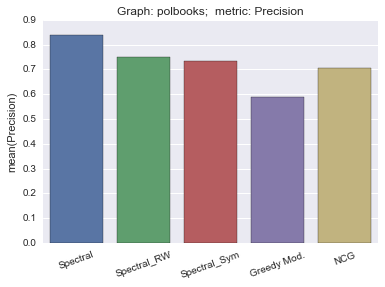

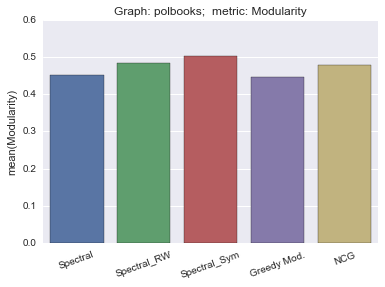

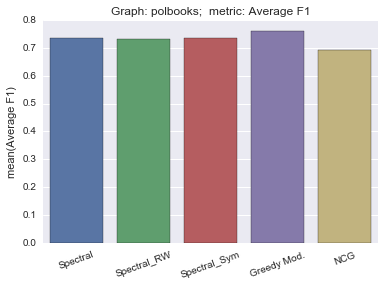

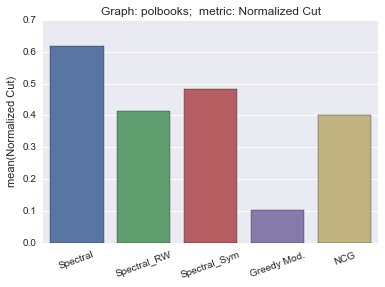

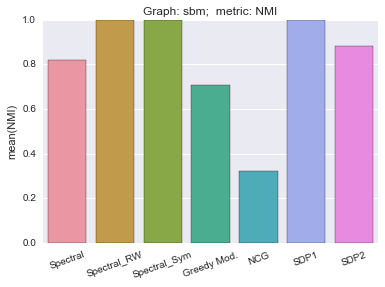

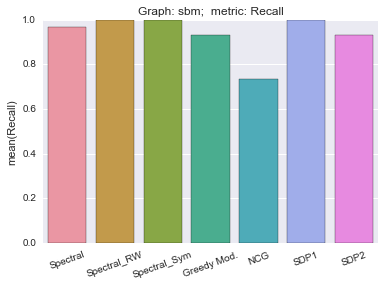

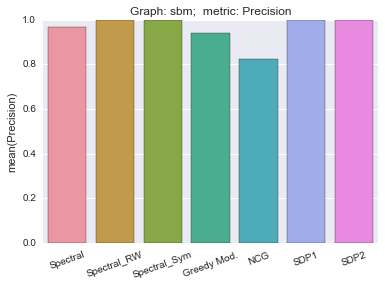

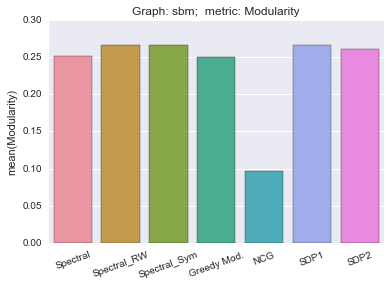

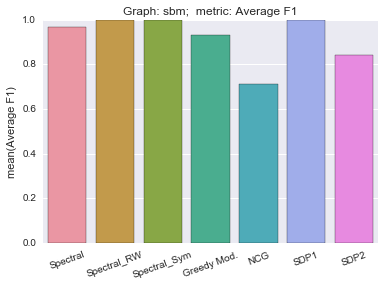

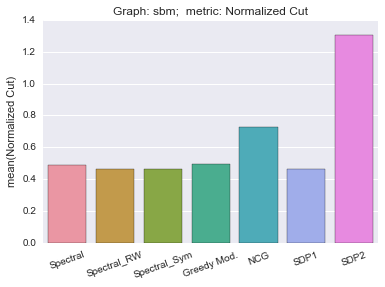

In [21]:
tests = ['football', 'karate', 'polbooks', 'sbm']
for i in [0, 1, 2, 3]:
    scores = test_methods(tests[i])
    #print(scores)